# Porter: Neural Network Regression

## About
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers.<br>
Porter works with a wide range of restaurants for delivering their items directly to the people.<br>
Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

## Objective
Given the information and features about an order, we need to predict the delivery time.

## Features in the dataset
1. **market_id** : integer id for the market where the restaurant lies
1. **created_at** : the timestamp at which the order was placed
1. **actual_delivery_time** : the timestamp when the order was delivered
1. **store_primary_category** : category for the restaurant
1. **order_protocol** : integer code value for order protocol (how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
1. **total_items** subtotal : final price of the order
1. **num_distinct_items** : the number of distinct items in the order
1. **min_item_price** : price of the cheapest item in the order
1. **max_item_price** : price of the costliest item in order
1. **total_onshift_partners** : number of delivery partners on duty at the time order was placed
1. **total_busy_partners** : number of delivery partners attending to other tasks
1. **total_outstanding_orders** : total number of orders to be fulfilled at the moment



## Exploratory data anlysis and preprocessing

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
raw = pd.read_csv('data/dataset.csv')

In [3]:
# top 5 rows of the data
raw.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [4]:
# shape of the data
print(f"Shape of the data: {raw.shape}")

Shape of the data: (197428, 14)


In [5]:
# info
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
# number of null values per column
raw.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [7]:
# datatypes of each column
raw.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

In [8]:
# describe int and float features
raw.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [9]:
# describe object features
raw.describe(include='object')

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


#### Observations
- The timestamps are object datatype which needs to be converted to datetime data type
- The delivery time is not present in the data, we need to extract it
- There are a bunch of null values in the data, we need to deal with them
- There are a bunch of categorical columns in the data which needs to be converted to vectors

### Extracting and analyzing delivery time

In [10]:
# converting the timestamps to datetime
raw['actual_delivery_time'] = pd.to_datetime(raw['actual_delivery_time'],format="%Y-%m-%d %H:%M:%S")
raw['created_at'] = pd.to_datetime(raw['created_at'],format="%Y-%m-%d %H:%M:%S")

# calculating the delivery time
raw['delivery_time'] = raw.apply(lambda x: (x['actual_delivery_time']-x['created_at']).seconds/60, axis=1)

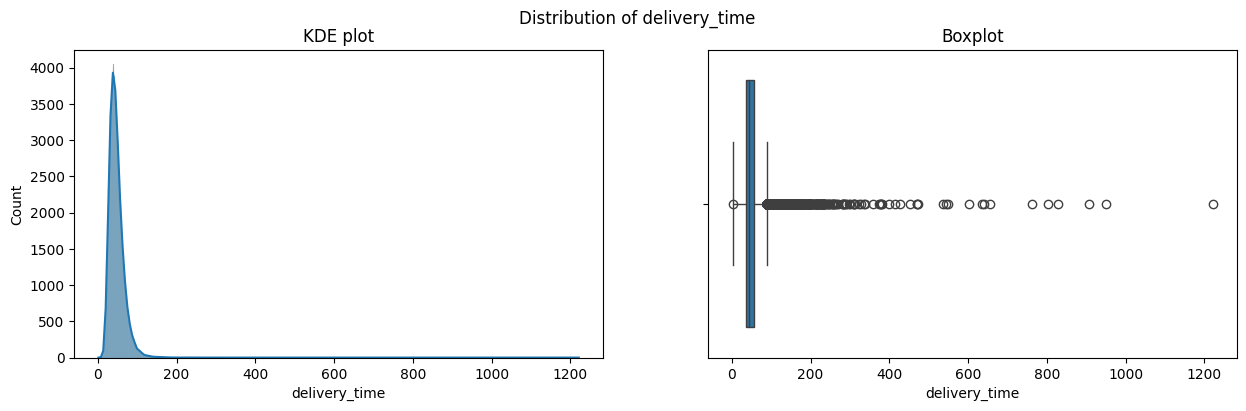

In [11]:
# plotting the delivery time
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data=raw, x='delivery_time', kde=True, ax=ax1)
sns.boxplot(data=raw, x='delivery_time', ax=ax2)
ax1.set_title('KDE plot')
ax2.set_title('Boxplot')
plt.suptitle('Distribution of delivery_time')
plt.show()

 This plot looks like a right tailed distribution. We can try taking log of this and plot again.

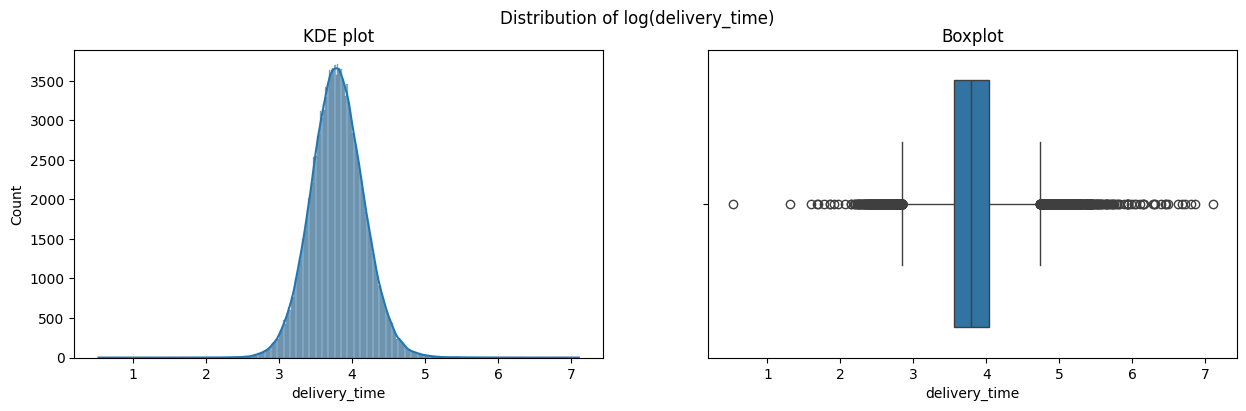

In [12]:
# plotting the log of delivery time
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
sns.histplot(np.log(raw['delivery_time']), kde=True, ax=ax1)
sns.boxplot(x = np.log(raw['delivery_time']), ax=ax2)
ax1.set_title('KDE plot')
ax2.set_title('Boxplot')
plt.suptitle('Distribution of log(delivery_time)')
plt.show()

This looks like a perfect distribution to predict, since it is a bell-shaped curve. We will let the outliers be present in this variable since it is the target variable.

In [13]:
raw['log_delivery_time'] = np.log(raw['delivery_time'])
raw = raw.drop(columns=['delivery_time'])

### Checking distinct values in categorical columns

In [14]:
cat_columns = ['market_id', 'store_id', 'store_primary_category', 'order_protocol']

for col in cat_columns:
    print(f"No. of categories in {col} = {raw[col].nunique()}")

No. of categories in market_id = 6
No. of categories in store_id = 6743
No. of categories in store_primary_category = 74
No. of categories in order_protocol = 7


Since the number of categories in store_id is large, one hot encoding will increase the number of dimensions drastically. So it is better to use mean encoding using delivery_time in training data to encode this feature. Rest of the features can be one hot encoded. We will also try mean encoding the rest of the features.

Extracting hour of the day and day of the week from the order time

In [15]:
# extracting hour and day of week
raw['day_of_week'] = raw['created_at'].dt.day_of_week
raw['hour_of_day'] = raw['created_at'].dt.hour

### Treating null values

We will fill the values as 'unknown' in the categorical columns, since they might contain some useful information

In [16]:
# filling null values in the categorical cols with a fixed value representing unknown
raw.loc[:,['market_id','order_protocol']] = raw.loc[:,['market_id','order_protocol']].fillna(value=-1)
raw.loc[:,['store_id','store_primary_category']] = raw.loc[:,['store_id','store_primary_category']].fillna(value='unknown')

# dropping datapoints will null values in the target columns
raw = raw.loc[~raw['log_delivery_time'].isnull()]

In [17]:
data = raw.copy(deep=True)

We will impute total_onshift_partners, total_busy_partners and total_outstanding_orders using the train data

In [18]:
# # removing created_at and actual_delivery_time since we do not need it anymore
data = data.drop(columns=['created_at','actual_delivery_time'])

## Visualizing the relationships

In [19]:
cat_cols = ['market_id', 'store_id', 'store_primary_category', 'order_protocol', 'day_of_week', 'hour_of_day']
num_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
target = 'log_delivery_time'

### Categorical variables

In [20]:
def plot_cat(cat_cols):
    c = 2
    r = len(cat_cols)//c + 1 if len(cat_cols)%c!=0 else len(cat_cols)//c
    fig, ax = plt.subplots(r, c, figsize=(7*c,6*r))
    ax_ = ax.ravel()

    for i in range(len(cat_cols)):
        top_10_values = list(data[cat_cols[i]].value_counts().index)[:10]
        sns.boxplot(data=data.loc[data[cat_cols[i]].isin(top_10_values)], x=cat_cols[i], y=target, ax=ax_[i])
        ax_[i].set_title(cat_cols[i])
        ax_[i].set_xticklabels(ax_[i].get_xticklabels(),rotation=30)
    plt.title(f'Categorical distribution of {target}')
    plt.tight_layout()
    plt.show()

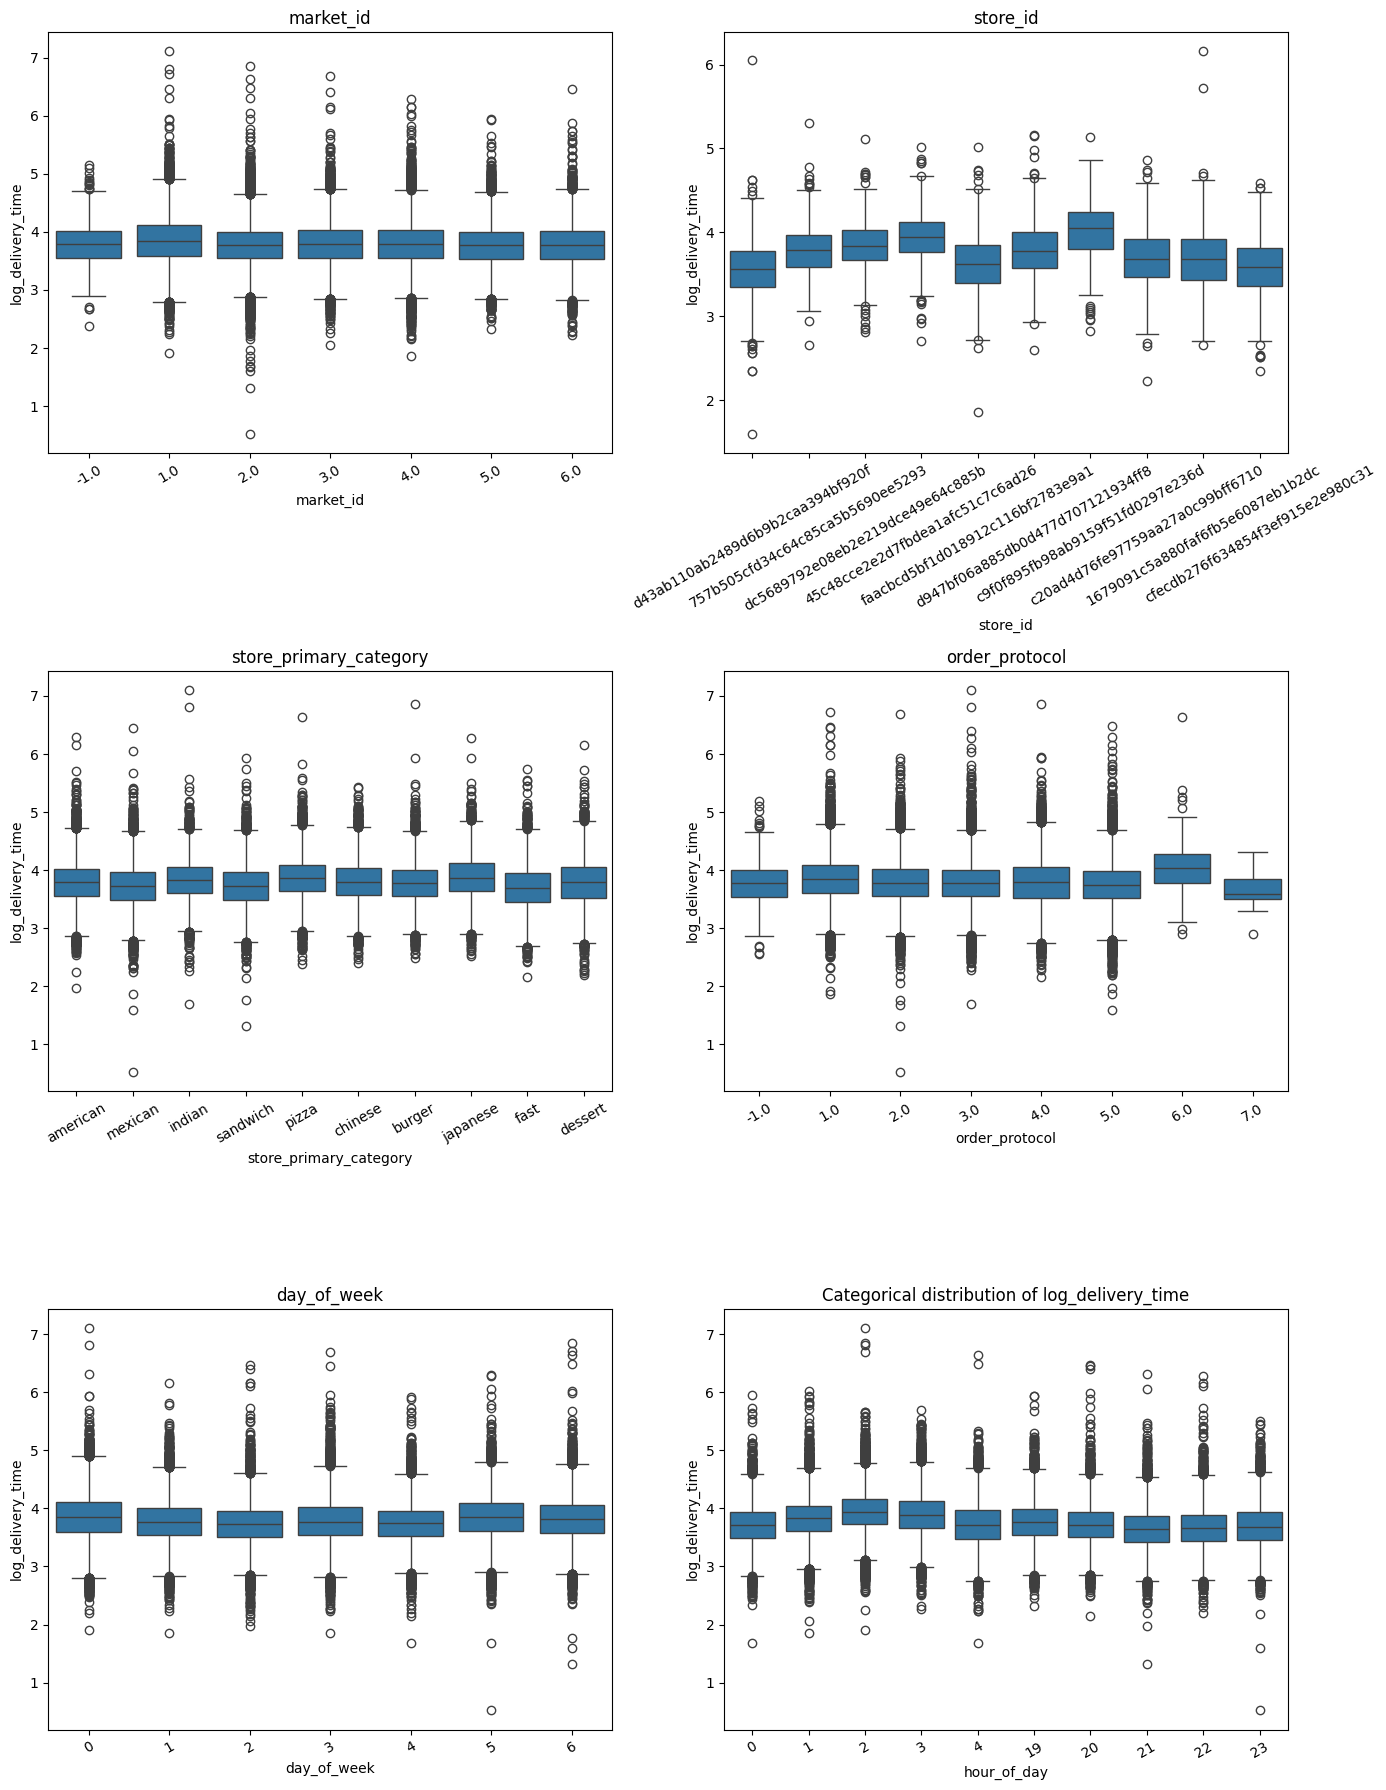

In [21]:
plot_cat(cat_cols)

#### Observations
- There is slight variation in the delivery time with the features hour of the day, store id, order protocol and store primary category
- For the rest, there seems to be no relation of the feature with the delivery time
- We can see there are a lot of outliers, we have to tackle them

### Numerical variables

In [22]:
def plot_num(num_cols):
    c = 2
    r = len(num_cols)//c + 1 if len(num_cols)%c!=0 else len(num_cols)//c
    fig, ax = plt.subplots(r, c, figsize=(7*c,6*r))
    ax_ = ax.ravel()

    for i in range(len(num_cols)):
        sns.scatterplot(data=data, x=num_cols[i], y=target, ax=ax_[i])
        ax_[i].set_title(num_cols[i])
    plt.title(f'Numerical distribution of {target}')
    plt.tight_layout()
    plt.show()

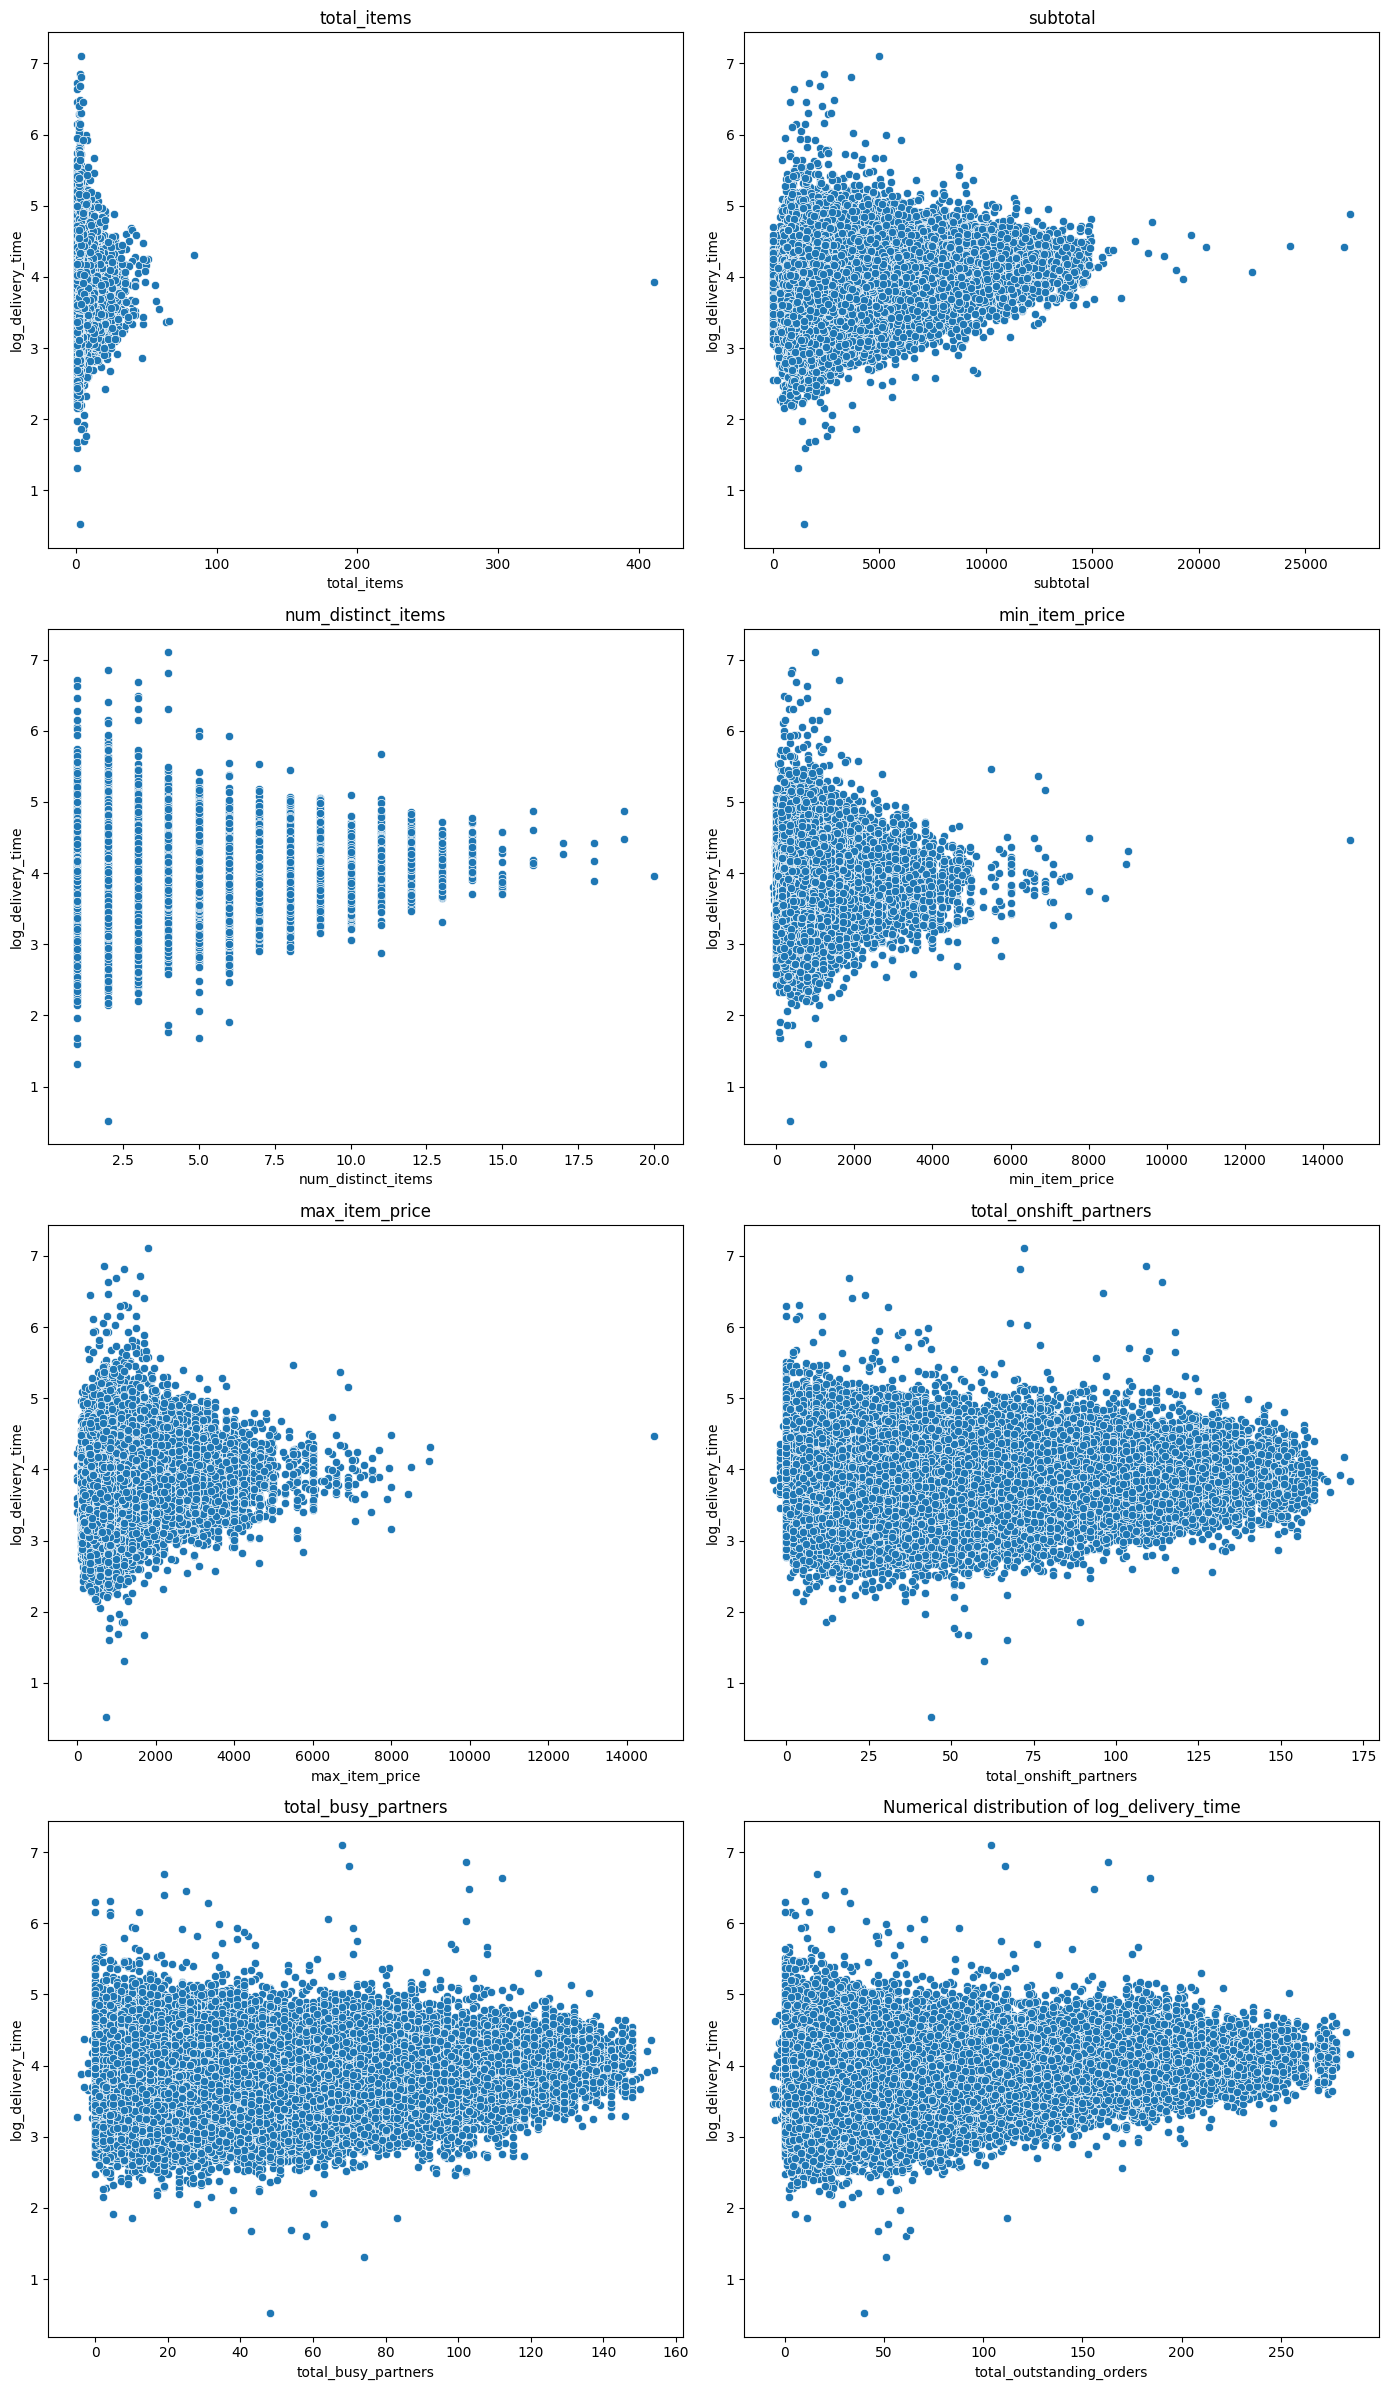

In [23]:
plot_num(num_cols)

#### Observations
- With all the features, we can see that there is a cone shape distribution which means as the values of the features increases, the delivery time converges towards a particular value
- We can see some outliers in the distribution

## Featurization

### Train, val and test split

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
sklearn.set_config(transform_output="pandas")

In [25]:
X = data.drop(columns=['log_delivery_time'])
y = data[['log_delivery_time']]

x_train_val, xtest, y_train_val, ytest = train_test_split(X, y, test_size=0.2, random_state=21)
xtrain, xval, ytrain, yval = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=21)

In [26]:
print(f"Train data: {xtrain.shape}")
print(f"Val data: {xval.shape}")
print(f"Test data: {xtest.shape}")

Train data: (126348, 14)
Val data: (31588, 14)
Test data: (39485, 14)


### Removing outliers from the train data before modelling

We will use the IQR technique to remove the outliers

In [27]:
q3 = np.percentile(data['log_delivery_time'], 75, interpolation='midpoint')
q1 = np.percentile(data['log_delivery_time'], 25, interpolation='midpoint')
iqr = q3 - q1

lower_cap = q1 - 1.5*iqr
upper_cap = q3 + 1.5*iqr

In [28]:
mask = (data['log_delivery_time'] > lower_cap) & (data['log_delivery_time'] < upper_cap)

points_before = data.shape[0]
data = data.loc[mask]
points_after = data.shape[0]
print(f"Lost datapoints = {(points_before-points_after)*100/points_before:.2f}%")
print(f"points before removal = {points_before}")
print(f"points after removal = {points_after}")

Lost datapoints = 1.16%
points before removal = 197421
points after removal = 195139


We did not lose a lot of points, only 1.16% of the points were removed as outliers.

### Target Encoding the categorical variables

In [29]:
import category_encoders as ce

cat_columns = ['market_id','store_id','store_primary_category','order_protocol','day_of_week','hour_of_day']
cat_enc = ce.TargetEncoder(cols=cat_columns)
cat_enc.fit(xtrain,ytrain)

xtrain = cat_enc.transform(xtrain)
xval = cat_enc.transform(xval)
xtest = cat_enc.transform(xtest)

### Filling null values

In [30]:
# filling null values with mean imputer

from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

mean_imp.fit(xtrain)

xtrain = mean_imp.transform(xtrain)
xval = mean_imp.transform(xval)
xtest = mean_imp.transform(xtest)

### Standardizing the data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xval = scaler.transform(xval)
xtest = scaler.transform(xtest)

In [32]:
# scaling y as well so the weights do not overshoot

scaler_y = StandardScaler()
scaler_y.fit(ytrain)

ytrain = scaler_y.transform(ytrain)
yval = scaler_y.transform(yval)
ytest = scaler_y.transform(ytest)

In [33]:
# saving the cleaned and transformed data

import os
import pickle

os.makedirs('data/transformed', exist_ok=True)

with open('data/transformed/xtrain.pkl', 'wb') as f:
    pickle.dump(xtrain, f)
with open('data/transformed/xval.pkl', 'wb') as f:
    pickle.dump(xval, f)
with open('data/transformed/xtest.pkl', 'wb') as f:
    pickle.dump(xtest, f)
with open('data/transformed/ytrain.pkl', 'wb') as f:
    pickle.dump(ytrain, f)
with open('data/transformed/yval.pkl', 'wb') as f:
    pickle.dump(yval, f)
with open('data/transformed/ytest.pkl', 'wb') as f:
    pickle.dump(ytest, f)
